## ANÁLISIS

Librerias

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

Funciones

In [29]:
def df_jugador(jugador, masc):

    filtro_jugador = (masc['jugadorA'] == jugador) | (masc['jugadorB'] == jugador)
    df_jugador = masc[filtro_jugador].copy()

    df_jugador_A = df_jugador[df_jugador['jugadorA'] == jugador].copy()
    df_jugador_B = df_jugador[df_jugador['jugadorB'] == jugador].copy()

    columnas_A = [col for col in df_jugador.columns if col.endswith('A')]
    columnas_B = [col for col in df_jugador.columns if col.endswith('B')]
    mapeo_columnas = {**{col_a: col_b for col_a, col_b in zip(columnas_A, columnas_B)},
                    **{col_b: col_a for col_a, col_b in zip(columnas_A, columnas_B)}}

    df_jugador_B_invertido = df_jugador_B.rename(columns=mapeo_columnas)

    df = pd.concat([df_jugador_A, df_jugador_B_invertido], ignore_index=True)

    df = df[df['acesA'].notna() & df['acesB'].notna()]

    if 'fecha' in df.columns:
        df = df.sort_values('fecha', ascending=False)

    return df

def df_jugador_superficie(jugador, masc, sup):

    filtro_jugador = (masc['jugadorA'] == jugador) | (masc['jugadorB'] == jugador)
    df_jugador = masc[filtro_jugador].copy()

    df_jugador_A = df_jugador[df_jugador['jugadorA'] == jugador].copy()
    df_jugador_B = df_jugador[df_jugador['jugadorB'] == jugador].copy()

    columnas_A = [col for col in df_jugador.columns if col.endswith('A')]
    columnas_B = [col for col in df_jugador.columns if col.endswith('B')]
    mapeo_columnas = {**{col_a: col_b for col_a, col_b in zip(columnas_A, columnas_B)},
                    **{col_b: col_a for col_a, col_b in zip(columnas_A, columnas_B)}}

    df_jugador_B_invertido = df_jugador_B.rename(columns=mapeo_columnas)

    df_final = pd.concat([df_jugador_A, df_jugador_B_invertido], ignore_index=True)

    df = df_final[df_final['superficie'] == sup]

    df = df[df['acesA'].notna() & df['acesB'].notna()]

    if 'fecha' in df.columns:
        df = df.sort_values('fecha', ascending=False)

    return df

In [30]:
datos = pd.read_csv(".\\data\\data2\\datosmasc_2025-06-18.csv")

pd.set_option('display.max_columns', None)
datos.head()

,torneo,jugadorA,jugadorB,setsA,setsB,fecha,acesA,acesB,porcentajePrimerSaqueA,porcentajePrimerSaqueB,porcentajeBreakPointsSalvadosA,porcentajeBreakPointsSalvadosB,porcentajePuntosGanadosAlRestoConPrimerSaqueA,porcentajePuntosGanadosAlRestoConPrimerSaqueB,porcentajePuntosGanadosAlRestoConSegundoSaqueA,porcentajePuntosGanadosAlRestoConSegundoSaqueB,porcentajePuntosGanadosA,porcentajePuntosGanadosB,porcentajeJuegosGanadosA,porcentajeJuegosGanadosB,cuotaA,cuotaB,dobleA,dobleB,porcentajeJuegosGanadosPrimerSaqueA,porcentajeJuegosGanadosPrimerSaqueB,porcentajeJuegosGanadosSegundoSaqueA,porcentajeJuegosGanadosSegundoSaqueB,porcentajePuntosGanadosAlRestoA,porcentajePuntosGanadosAlRestoB,porcentajePuntosBreakConvertidosA,porcentajePuntosBreakConvertidosB,porcentajePuntosGanadosAlSaqueA,porcentajePuntosGanadosAlSaqueB,porcentajeJuegosGanadosAlSaqueA,porcentajeJuegosGanadosAlSaqueB,porcentajeJuegosGanadosAlRestoA,porcentajeJuegosGanadosAlRestoB,superficie,hora,sets,ganador
0,royan,Paris T.,De Schepper K.,2,1,2025-06-16,1.0,3.0,58.0,61.0,60.0,0.0,25.0,29.0,61.0,37.0,54.0,46.0,60.0,40.0,1.70,2.00,3.0,5.0,71.0,75.0,63.0,39.0,39.0,32.0,100.0,40.0,68.0,61.0,87.0,67.0,33.0,13.0,Clay,11:10,3,0
1,sassuolo,Bocchi L.,Nijboer R.,0,2,2025-06-16,3.0,2.0,55.0,75.0,50.0,67.0,34.0,35.0,44.0,64.0,44.0,56.0,33.0,67.0,3.80,1.20,4.0,2.0,65.0,66.0,36.0,56.0,37.0,48.0,33.0,50.0,52.0,63.0,56.0,89.0,11.0,44.0,Clay,12:35,2,1
2,royan,Alcala Gurri M.,Beauge M.,2,0,2025-06-16,1.0,2.0,79.0,61.0,100.0,56.0,47.0,22.0,59.0,40.0,62.0,38.0,75.0,25.0,1.36,2.70,2.0,2.0,78.0,53.0,60.0,41.0,52.0,26.0,44.0,0.0,74.0,48.0,100.0,50.0,50.0,0.0,Clay,12:45,2,0
3,royan,Marionneau L.,Santamarta Roig A.,0,2,2025-06-16,0.0,1.0,77.0,64.0,33.0,100.0,28.0,50.0,45.0,67.0,39.0,61.0,20.0,80.0,3.95,1.20,2.0,4.0,50.0,72.0,33.0,55.0,34.0,54.0,0.0,67.0,46.0,66.0,43.0,100.0,0.0,57.0,Clay,11:20,2,1
4,royan,Poullain L.,Bouquet L.,2,0,2025-06-16,5.0,2.0,76.0,55.0,50.0,50.0,30.0,36.0,60.0,38.0,53.0,47.0,57.0,43.0,1.36,2.75,1.0,3.0,64.0,70.0,63.0,40.0,43.0,36.0,50.0,50.0,64.0,57.0,80.0,64.0,36.0,20.0,Clay,11:20,2,0


Correlación

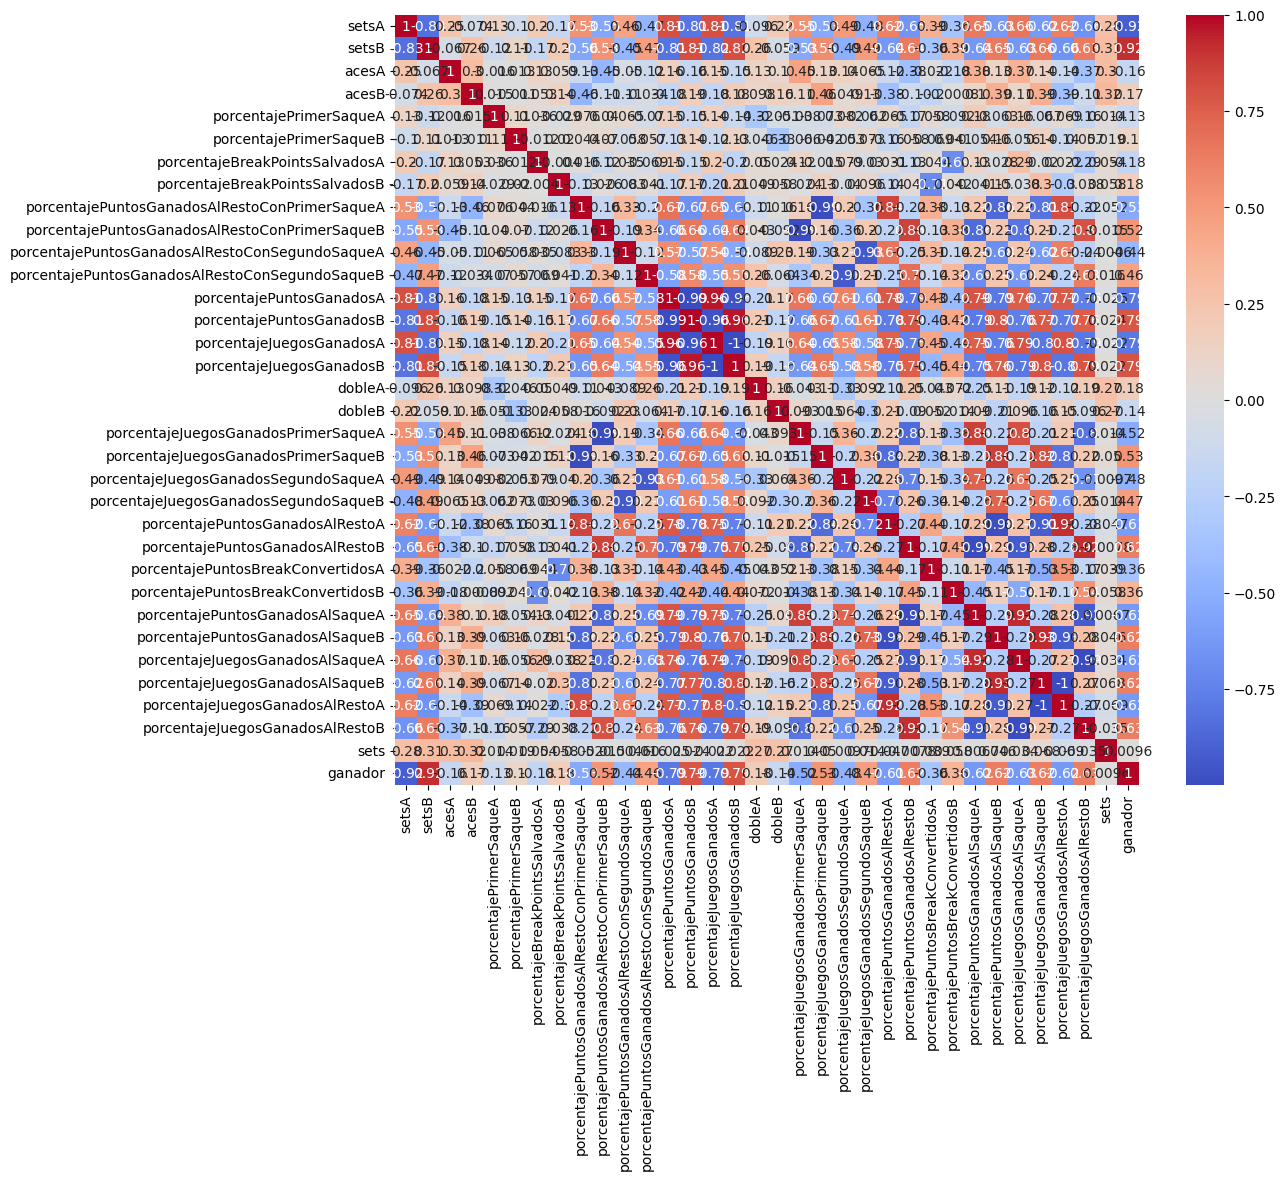

In [31]:
corr = datos.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Tengo que eliminar columnas con correlación. Se observa que cuando hay variables de porcentaje sobra una de ellas ya que son complementarias.

In [32]:
c = ['setsA', 'setsB', 'porcentajePuntosGanadosAlRestoConPrimerSaqueB', 'porcentajePuntosGanadosAlRestoConSegundoSaqueB', 'porcentajePuntosGanadosB', 'porcentajeJuegosGanadosB', 'porcentajeJuegosGanadosPrimerSaqueB',
     'porcentajeJuegosGanadosSegundoSaqueB', 'porcentajePuntosGanadosAlRestoB', 'porcentajePuntosBreakConvertidosB', 'porcentajePuntosGanadosAlSaqueB', 'porcentajeJuegosGanadosAlSaqueB', 'porcentajeJuegosGanadosAlRestoB']
datos = datos.drop(columns = c)

Boxplot

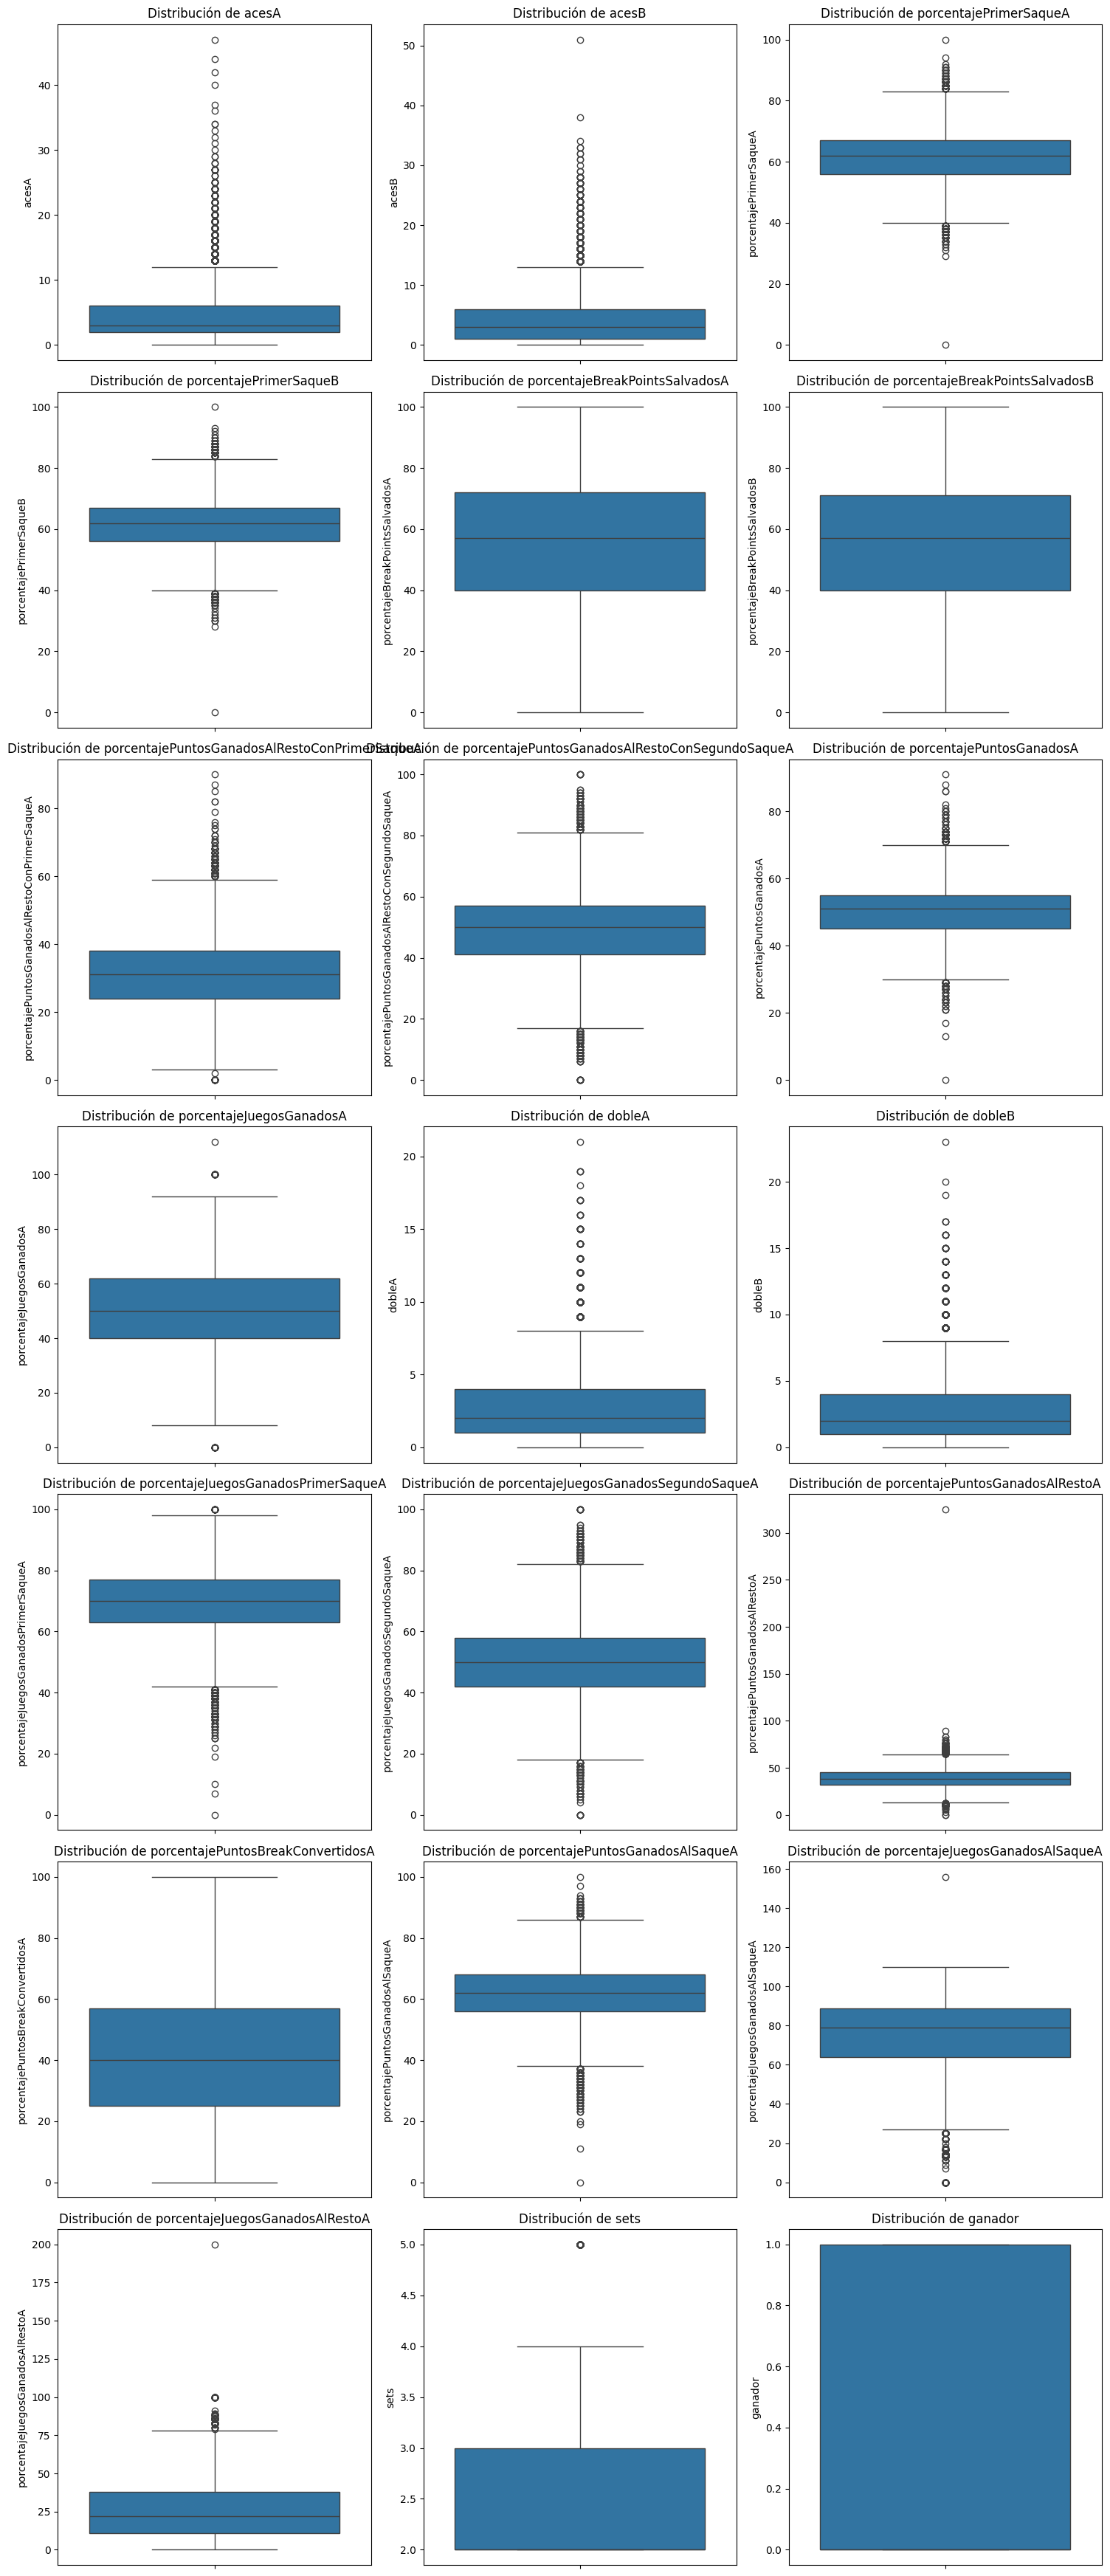

In [33]:
# Número de columnas
cols = 3

# Calcula el número de filas necesarias para los gráficos
numerical_columns = datos.select_dtypes(include=['int64', 'float64']).columns
rows = (len(numerical_columns) + cols - 1) // cols  # Redondeo hacia arriba

# Crear la figura
plt.figure(figsize=(5 * cols, 5 * rows))

# Crear los subgráficos
for i, col in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)  # Definir filas y columnas
    sns.boxplot(y=datos[col])  # Usar 'y' para boxplot en vertical
    plt.title(f"Distribución de {col}")

# Ajustar la disposición para que no se sobrepongan
plt.tight_layout()

# Mostrar la figura
plt.show()


Histogramas

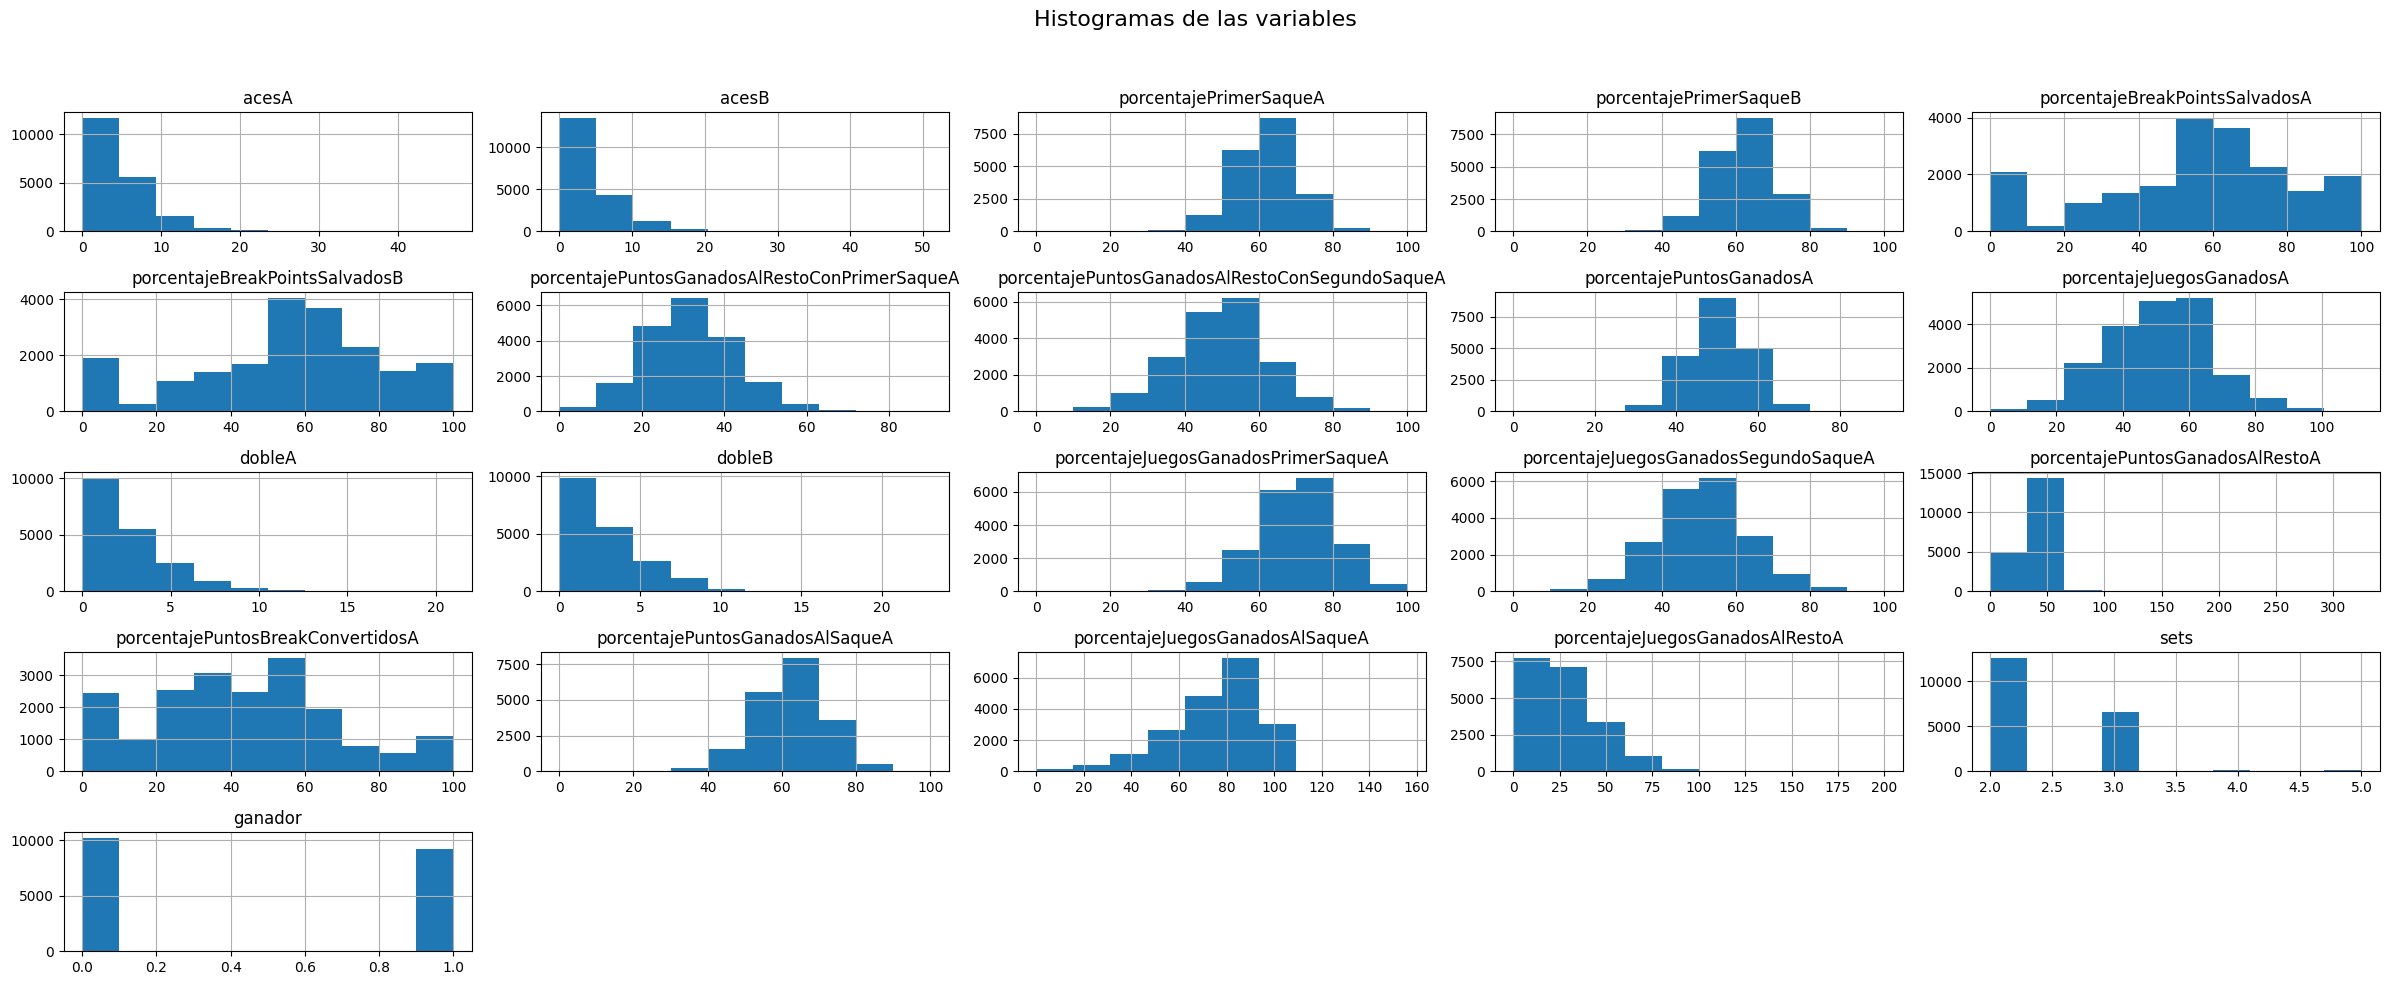

In [34]:
datos.hist(figsize=(24, 10))
plt.suptitle("Histogramas de las variables", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [35]:
jugadorA = "Michelsen A."
jugadorB = 'Tsitsipas S.'
superf = 'Grass'

dfA = df_jugador(jugadorA, datos)
dfB = df_jugador(jugadorB, datos)

display(dfA.head())
display(dfB.head())

dfA_sup = df_jugador_superficie(jugadorA, datos, superf)
dfB_sup = df_jugador_superficie(jugadorB, datos, superf)

display(dfA_sup.head())
display(dfB_sup.head())

print("Media de aces realizados por", jugadorA, "en los últimos", len(dfA),"partidos",dfA['acesA'].astype(int).mean())
print("Media de aces recibidos por", jugadorA, "en los últimos", len(dfA),"partidos",dfA['acesB'].astype(int).mean())
print("------------------------")
print("Media de aces realizados por", jugadorB, "en los últimos", len(dfB),"partidos",dfB['acesA'].astype(int).mean())
print("Media de aces recibidos por", jugadorB, "en los últimos", len(dfB),"partidos",dfB['acesB'].astype(int).mean())

print("-----------------------------------------------")

print("Media de aces realizados por", jugadorA, "en los últimos", len(dfA_sup),"partidos en", superf, ":",dfA_sup['acesA'].astype(int).mean())
print("Media de aces recibidos por", jugadorA, "en los últimos", len(dfA_sup),"partidos en", superf, ":",dfA_sup['acesB'].astype(int).mean())
print("------------------------")
print("Media de aces realizados por", jugadorB, "en los últimos", len(dfB_sup),"partidos en", superf, ":",dfB_sup['acesA'].astype(int).mean())
print("Media de aces recibidos por", jugadorB, "en los últimos", len(dfB_sup),"partidos en", superf, ":",dfB_sup['acesB'].astype(int).mean())

,torneo,jugadorA,jugadorB,fecha,acesA,acesB,porcentajePrimerSaqueA,porcentajePrimerSaqueB,porcentajeBreakPointsSalvadosA,porcentajeBreakPointsSalvadosB,porcentajePuntosGanadosAlRestoConPrimerSaqueA,porcentajePuntosGanadosAlRestoConSegundoSaqueA,porcentajePuntosGanadosA,porcentajeJuegosGanadosA,cuotaA,cuotaB,dobleA,dobleB,porcentajeJuegosGanadosPrimerSaqueA,porcentajeJuegosGanadosSegundoSaqueA,porcentajePuntosGanadosAlRestoA,porcentajePuntosBreakConvertidosA,porcentajePuntosGanadosAlSaqueA,porcentajeJuegosGanadosAlSaqueA,porcentajeJuegosGanadosAlRestoA,superficie,hora,sets,ganador
0,stuttgart,Michelsen A.,Engel J.,2025-06-12,10.0,5.0,61.0,66.0,60.0,0.0,0.0,44.0,41.0,40.0,1.13,6.00,5.0,1.0,67.0,44.0,15.0,0.0,58.0,80.0,0.0,Grass,11:10,2,1
1,stuttgart,Michelsen A.,Monfils G.,2025-06-10,6.0,14.0,70.0,68.0,33.0,75.0,27.0,60.0,53.0,55.0,1.80,2.00,5.0,7.0,79.0,52.0,38.0,25.0,71.0,87.0,21.0,Grass,18:35,3,0
2,french-open,Michelsen A.,Cerundolo J. M.,2025-05-25,2.0,1.0,72.0,44.0,57.0,33.0,17.0,43.0,41.0,33.0,2.00,1.80,4.0,4.0,56.0,32.0,32.0,67.0,49.0,54.0,14.0,Clay,15:55,3,1
52,geneva,Michelsen A.,Borges N.,2025-05-18,6.0,4.0,65.0,66.0,25.0,80.0,2.20,1.0,54.0,57.0,1.67,27.0,1.0,50.0,72.0,66.0,35.0,75.0,70.0,93.0,21.0,Clay,14:55,3,0
3,rome,Michelsen A.,Djere L.,2025-05-09,0.0,1.0,69.0,62.0,38.0,75.0,29.0,43.0,39.0,20.0,2.75,1.44,3.0,0.0,50.0,33.0,35.0,25.0,45.0,29.0,13.0,Clay,14:50,2,1


,torneo,jugadorA,jugadorB,fecha,acesA,acesB,porcentajePrimerSaqueA,porcentajePrimerSaqueB,porcentajeBreakPointsSalvadosA,porcentajeBreakPointsSalvadosB,porcentajePuntosGanadosAlRestoConPrimerSaqueA,porcentajePuntosGanadosAlRestoConSegundoSaqueA,porcentajePuntosGanadosA,porcentajeJuegosGanadosA,cuotaA,cuotaB,dobleA,dobleB,porcentajeJuegosGanadosPrimerSaqueA,porcentajeJuegosGanadosSegundoSaqueA,porcentajePuntosGanadosAlRestoA,porcentajePuntosBreakConvertidosA,porcentajePuntosGanadosAlSaqueA,porcentajeJuegosGanadosAlSaqueA,porcentajeJuegosGanadosAlRestoA,superficie,hora,sets,ganador
31,french-open,Tsitsipas S.,Gigante M.,2025-05-28,4.0,9.0,64.0,60.0,64.0,85.0,1.08,6.0,53.0,58.0,8.00,26.0,2.0,59.0,79.0,48.0,38.0,36.0,67.0,90.0,25.0,Clay,16:30,4,0
32,french-open,Tsitsipas S.,Etcheverry T. M.,2025-05-26,12.0,8.0,57.0,54.0,50.0,69.0,1.20,3.0,44.0,39.0,4.50,23.0,6.0,38.0,67.0,46.0,29.0,50.0,57.0,73.0,6.0,Clay,13:40,3,1
33,rome,Tsitsipas S.,Fils A.,2025-05-11,5.0,3.0,61.0,63.0,0.0,50.0,2.20,4.0,52.0,54.0,1.67,30.0,0.0,53.0,63.0,70.0,39.0,100.0,66.0,85.0,23.0,Clay,11:10,3,0
34,rome,Tsitsipas S.,Muller A.,2025-05-09,8.0,2.0,63.0,75.0,0.0,57.0,1.25,3.0,43.0,40.0,4.00,19.0,3.0,43.0,58.0,44.0,28.0,100.0,55.0,70.0,10.0,Clay,14:10,2,1
0,madrid,Tsitsipas S.,Musetti L.,2025-04-29,1.0,4.0,57.0,76.0,75.0,80.0,23.0,58.0,47.0,46.0,1.80,2.00,6.0,0.0,78.0,44.0,31.0,20.0,63.0,83.0,8.0,Clay,15:45,2,1


,torneo,jugadorA,jugadorB,fecha,acesA,acesB,porcentajePrimerSaqueA,porcentajePrimerSaqueB,porcentajeBreakPointsSalvadosA,porcentajeBreakPointsSalvadosB,porcentajePuntosGanadosAlRestoConPrimerSaqueA,porcentajePuntosGanadosAlRestoConSegundoSaqueA,porcentajePuntosGanadosA,porcentajeJuegosGanadosA,cuotaA,cuotaB,dobleA,dobleB,porcentajeJuegosGanadosPrimerSaqueA,porcentajeJuegosGanadosSegundoSaqueA,porcentajePuntosGanadosAlRestoA,porcentajePuntosBreakConvertidosA,porcentajePuntosGanadosAlSaqueA,porcentajeJuegosGanadosAlSaqueA,porcentajeJuegosGanadosAlRestoA,superficie,hora,sets,ganador
0,stuttgart,Michelsen A.,Engel J.,2025-06-12,10.0,5.0,61.0,66.0,60.0,0.0,0.0,44.0,41.0,40.0,1.13,6.00,5.0,1.0,67.0,44.0,15.0,0.0,58.0,80.0,0.0,Grass,11:10,2,1
1,stuttgart,Michelsen A.,Monfils G.,2025-06-10,6.0,14.0,70.0,68.0,33.0,75.0,27.0,60.0,53.0,55.0,1.80,2.00,5.0,7.0,79.0,52.0,38.0,25.0,71.0,87.0,21.0,Grass,18:35,3,0
37,newport,Michelsen A.,Giron M.,2024-07-21,0.0,13.0,70.0,63.0,77.0,89.0,18.0,55.0,47.0,42.0,1.62,2.30,2.0,2.0,67.0,43.0,32.0,11.0,60.0,81.0,6.0,Grass,20:40,3,1
72,newport,Michelsen A.,Opelka R.,2024-07-20,1.0,8.0,66.0,54.0,100.0,44.0,1.62,0.0,36.0,14.0,2.30,15.0,1.0,50.0,50.0,36.0,27.0,0.0,44.0,29.0,0.0,Grass,19:10,2,1
38,newport,Michelsen A.,Kovacevic A.,2024-07-18,5.0,12.0,68.0,68.0,100.0,67.0,33.0,50.0,54.0,60.0,1.42,2.85,3.0,0.0,70.0,74.0,38.0,33.0,71.0,100.0,20.0,Grass,21:00,2,0


,torneo,jugadorA,jugadorB,fecha,acesA,acesB,porcentajePrimerSaqueA,porcentajePrimerSaqueB,porcentajeBreakPointsSalvadosA,porcentajeBreakPointsSalvadosB,porcentajePuntosGanadosAlRestoConPrimerSaqueA,porcentajePuntosGanadosAlRestoConSegundoSaqueA,porcentajePuntosGanadosA,porcentajeJuegosGanadosA,cuotaA,cuotaB,dobleA,dobleB,porcentajeJuegosGanadosPrimerSaqueA,porcentajeJuegosGanadosSegundoSaqueA,porcentajePuntosGanadosAlRestoA,porcentajePuntosBreakConvertidosA,porcentajePuntosGanadosAlSaqueA,porcentajeJuegosGanadosAlSaqueA,porcentajeJuegosGanadosAlRestoA,superficie,hora,sets,ganador
57,wimbledon,Tsitsipas S.,Ruusuvuori E.,2024-07-04,20.0,7.0,67.0,67.0,67.0,33.0,1.22,6.0,50.0,50.0,4.33,20.0,5.0,50.0,80.0,53.0,30.0,33.0,71.0,90.0,10.0,Grass,18:50,4,0
58,wimbledon,Tsitsipas S.,Daniel T.,2024-07-02,15.0,10.0,69.0,51.0,86.0,70.0,1.05,2.0,47.0,44.0,11.00,23.0,2.0,41.0,68.0,59.0,29.0,14.0,64.0,82.0,6.0,Grass,18:05,3,1
59,halle,Tsitsipas S.,Struff J-L.,2024-06-20,5.0,8.0,60.0,58.0,33.0,0.0,1.91,3.0,56.0,60.0,1.91,26.0,1.0,48.0,84.0,73.0,34.0,67.0,79.0,100.0,20.0,Grass,18:35,2,0
60,halle,Tsitsipas S.,Squire H.,2024-06-18,7.0,6.0,65.0,74.0,0.0,100.0,1.14,1.0,46.0,50.0,5.50,16.0,4.0,13.0,84.0,45.0,14.0,0.0,74.0,100.0,0.0,Grass,19:15,2,1


Media de aces realizados por Michelsen A. en los últimos 89 partidos 4.370786516853933
Media de aces recibidos por Michelsen A. en los últimos 89 partidos 5.685393258426966
------------------------
Media de aces realizados por Tsitsipas S. en los últimos 65 partidos 6.661538461538462
Media de aces recibidos por Tsitsipas S. en los últimos 65 partidos 5.369230769230769
-----------------------------------------------
Media de aces realizados por Michelsen A. en los últimos 14 partidos en Grass : 5.428571428571429
Media de aces recibidos por Michelsen A. en los últimos 14 partidos en Grass : 10.642857142857142
------------------------
Media de aces realizados por Tsitsipas S. en los últimos 4 partidos en Grass : 11.75
Media de aces recibidos por Tsitsipas S. en los últimos 4 partidos en Grass : 7.75
